In [40]:
import nltk
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import json

In [41]:
from jsonmerge import merge
file0 = "/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/gwbush_files/gwbush0.json"

with open(file0) as f:
    data0 = json.loads(f.read())
result = data0

for c in range(0, 45):
    filen = "/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/gwbush_files/gwbush" + str(c) + ".json"
    with open(filen) as f:
        datan = json.loads(f.read())
    result = merge(result, datan)

In [42]:
with open("/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/gwbush_files/gwbush_master.json", "w") as outfile: 
    json.dump(result, outfile)

In [43]:
file = "/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/gwbush_files/gwbush_master.json"
with open(file) as f:
    data_t = json.loads(f.read())


In [44]:
len(data_t)

4447

In [45]:
## Dict to store stats on speeches referencing different countries and trade 


"""
    Function that returns nested dict that stores stats on the number of times the words trade, China, Canada, Mexico, 
    Japan, Germany, NAFTA are mentioned.
    Stats on the number of times trade and China, trade and Japan, trade and Canada, trade and Mexico, trade and 
    Japan, trade and Germany are mentioned together 
    Function stores mentions keyed by speech number, president and categories
    
    Args: 
    Nested dict of speeches
    
    Returns:
    Nested dict of stats
"""
dict1 = {}
total = []
trade = []
china = []
japan = []
mexico = []
canada = []
germany = []
korea = []
NAFTA = []
trade_china = []
trade_japan = []
trade_mexico = []
trade_canada = []
trade_germany = []
    
for x in data_t:
    if 'Press Releases' not in data_t[x]["category"]:
        total.append(data_t[x]['text'])
        if 'trade' in data_t[x]['text']:
            trade.append([data_t[x]['text']])
        dict1['trade'] = len(trade)
        if 'Canada' in data_t[x]['text']:
            canada.append([data_t[x]['text']])
        dict1['canada'] = len(canada)
        if 'China' in data_t[x]['text']:
            china.append([data_t[x]['text']])
        dict1['china'] = len(china)
        if 'Mexico' in data_t[x]['text']:
            mexico.append([data_t[x]['text']])
        dict1['mexico'] = len(mexico)
        if 'Japan' in data_t[x]['text']:
            japan.append([data_t[x]['text']])
        dict1['japan'] = len(japan)
        if 'Germany' in data_t[x]['text']:
            germany.append([data_t[x]['text']])
        dict1['germany'] = len(germany)
        if 'South Korea' in data_t[x]['text']:
            korea.append([data_t[x]['text']])
        dict1['korea'] = len(korea)
        if 'NAFTA' in data_t[x]['text']:
            NAFTA.append([data_t[x]['text']])
        dict1['NAFTA'] = len(NAFTA)
        if 'trade' in data_t[x]['text'] and 'China' in data_t[x]['text']:
            trade_china.append([data_t[x]['text']])
        dict1['trade_china'] = len(trade_china)
        if 'trade' in data_t[x]['text'] and 'Mexico' in data_t[x]['text']:
            trade_mexico.append([data_t[x]['text']])
        dict1['trade_mexico'] = len(trade_mexico) 
        if 'trade' in data_t[x]['text'] and 'Canada' in data_t[x]['text']:
            trade_canada.append([data_t[x]['text']])
        dict1['trade_canada'] = len(trade_canada)
        if 'trade' in data_t[x]['text'] and 'Japan' in data_t[x]['text']:
            trade_japan.append([data_t[x]['text']])
        dict1['trade_japan'] = len(trade_japan)
        if 'trade' in data_t[x]['text'] and 'Germany' in data_t[x]['text']:
            trade_germany.append([data_t[x]['text']])
        dict1['trade_germany'] = len(trade_germany)
        if 'trade' in data_t[x]['text'] and 'Japan' in data_t[x]['text']:
            trade_japan.append([data_t[x]['text']])
        dict1['trade_japan'] = len(trade_japan)
        if 'trade' in data_t[x]['text'] and 'Canada' in data_t[x]['text']:
            trade_canada.append([data_t[x]['text']])
        dict1['trade_canada'] = len(trade_canada)
dict1['total'] = len(total)
    

In [46]:
dict1

{'trade': 1051,
 'canada': 192,
 'china': 490,
 'mexico': 330,
 'japan': 491,
 'germany': 261,
 'korea': 207,
 'NAFTA': 84,
 'trade_china': 266,
 'trade_mexico': 185,
 'trade_canada': 234,
 'trade_japan': 430,
 'trade_germany': 107,
 'total': 4447}

In [47]:
list_prop = [t/4447 for t in dict1.values()]
list_prop = list_prop[:-1]
list_keys = list(dict1.keys())[:-1]




In [48]:
list_prop = [x*100 for x in list_prop]


In [49]:
df = pd.DataFrame({'Word' : list_keys, 'Percentage' : list_prop}) 
df = df.sort_values("Percentage", ascending = False)
df.reset_index(drop=True)
df

,Word,Percentage
0,trade,23.633911
4,japan,11.041151
2,china,11.018664
11,trade_japan,9.669440
3,mexico,7.420733
8,trade_china,5.981561
5,germany,5.869125
10,trade_canada,5.261974
6,korea,4.654823
1,canada,4.317517


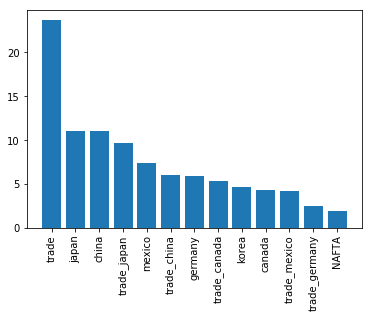

<Figure size 21600x14400 with 0 Axes>

In [50]:
plt.bar(x = df['Word'], height = df['Percentage'])
plt.xticks(rotation = 'vertical')

plt.figure( figsize=(300,200) )
plt.show()


In [51]:
## Dict to store stats on campaign speeches referencing different countries and trade 


"""
Function that returns nested dict that stores stats on the number of times the words trade, China, Canada, Mexico, 
Japan, Germany, NAFTA are mentioned.
Stats on the number of times trade and China, trade and Japan, trade and Canada, trade and Mexico, trade and 
Japan, trade and Germany are mentioned together 
Function stores mentions keyed by speech number, president and categories
    
Args: 
Nested dict of speeches
    
Returns:
Nested dict of stats
"""
cdict1 = {}
    
campaign = []
ctrade = []
cchina = []
cjapan = []
cmexico = []
ccanada = []
ckorea = []
cgermany = []
cNAFTA = []
ctrade_china = []
ctrade_japan = []
ctrade_mexico = []
ctrade_canada = []
ctrade_germany = []
    
for x in data_t:
    if 'Campaign Documents' in data_t[x]["category"]:
        campaign.append([data_t[x]['text']])
        if 'trade' in data_t[x]['text']:
            ctrade.append([data_t[x]['text']])
        cdict1['trade'] = len(ctrade)
        if 'China' in data_t[x]['text']:
            cchina.append([data_t[x]['text']])
        cdict1['china'] = len(cchina)
        if 'Mexico' in data_t[x]['text']:
            cmexico.append([data_t[x]['text']])
        cdict1['mexico'] = len(cmexico)
        if 'Japan' in data_t[x]['text']:
            cjapan.append([data_t[x]['text']])
        cdict1['japan'] = len(cjapan)
        if 'Germany' in data_t[x]['text']:
            cgermany.append([data_t[x]['text']])
        cdict1['germany'] = len(cgermany)
        if 'South Korea' in data_t[x]['text']:
            ckorea.append([data_t[x]['text']])
        cdict1['korea'] = len(ckorea)
        if 'NAFTA' in data_t[x]['text']:
            cNAFTA.append([data_t[x]['text']])
        cdict1['NAFTA'] = len(cNAFTA)
        if 'trade' in data_t[x]['text'] and 'China' in data_t[x]['text']:
            ctrade_china.append([data_t[x]['text']])
        cdict1['trade_china'] = len(ctrade_china)
        if 'trade' in data_t[x]['text'] and 'Mexico' in data_t[x]['text']:
            ctrade_mexico.append([data_t[x]['text']])
        cdict1['trade_mexico'] = len(ctrade_mexico) 
        if 'trade' in data_t[x]['text'] and 'Canada' in data_t[x]['text']:
            ctrade_canada.append([data_t[x]['text']])
        cdict1['trade_canada'] = len(ctrade_canada)
        if 'trade' in data_t[x]['text'] and 'Japan' in data_t[x]['text']:
            ctrade_japan.append([data_t[x]['text']])
        cdict1['trade_japan'] = len(ctrade_japan)
        if 'trade' in data_t[x]['text'] and 'germany' in data_t[x]['text']:
            ctrade_germany.append([data_t[x]['text']])
        cdict1['trade_germany'] = len(ctrade_germany)
        if 'trade' in data_t[x]['text'] and 'Japan' in data_t[x]['text']:
            ctrade_japan.append([data_t[x]['text']])
        cdict1['trade_japan'] = len(ctrade_japan)
cdict1['total'] = len(campaign)
    

In [52]:
cdict1

{'trade': 1,
 'china': 0,
 'mexico': 0,
 'japan': 0,
 'germany': 0,
 'korea': 0,
 'NAFTA': 0,
 'trade_china': 0,
 'trade_mexico': 0,
 'trade_canada': 0,
 'trade_japan': 0,
 'trade_germany': 0,
 'total': 9}

In [53]:
with open("/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/gwbush_files/gwbush_textonly.txt", "w") as f:
    f.write("")

for x in data_t:
    if 'Press Releases' not in data_t[x]["category"]:
        with open("/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/gwbush_files/gwbush_text_only.txt", "a") as f: 
            f.write(data_t[x]["text"])
            f.write("\n")
        
        

In [76]:
f=open('/Users/kalyani/01ColumbiaQMSS/RA_Carnegie/APP/gwbush_files/gwbush_text_only.txt','r')
raw=f.read()
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)

In [77]:
def Freq_dict_in_sentence(word = "China", raw = raw):
    """
    Accepts word. Returns frequency dictionary for sentences in which word occurs.
    Arg:
    word (string) : word to search for
    text (nltk.Text object)
    """
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import stopwords
    import re
    from nltk import FreqDist
    sents = nltk.sent_tokenize(raw)
    sents_word = []
    for sent in sents:
        if word in sent:
            sents_word.append(sent)
    tokens = nltk.word_tokenize(str(sents_word))
    print("length of sents ", len(sents_word))
    stop_words = set(stopwords.words('english'))
    words_china = [w for w in tokens if not w in stop_words] 
    bad_words = [w for w in words_china if re.search('[@\`!$%&(),-\./0123456789_–?\[\]\x27\’\:;]', w)]
    words_china = [w for w in words_china if w not in bad_words]
    lemmatizer = WordNetLemmatizer()
    words_chinal = []
    for t in words_china:
        k = lemmatizer.lemmatize(t)
        words_chinal.append(k)
    fdist_china = FreqDist(words_chinal)
    return fdist_china

    
    
        
    

In [78]:
def freq_dist_mostcommon(word, number = 5):
    fd = Freq_dict_in_sentence(word, raw)
    return fd.most_common(number)

In [79]:
def fd_plot(word, number):
    fd = Freq_dict_in_sentence(word, raw)
    fd[word] = 0
    fd.plot(number, cumulative = False) 
    plt.figure( figsize=(500,300) )

    

In [ ]:
fd_plot('trade', 50)

In [80]:
freq_dist_mostcommon('trade', 100)

length of sents  8044


[('trade', 8630),
 ('free', 2226),
 ('I', 1760),
 ('agreement', 1616),
 ('people', 958),
 ('country', 828),
 ('world', 814),
 ('good', 668),
 ('United', 664),
 ('States', 650),
 ('open', 612),
 ('market', 596),
 ('America', 594),
 ('nation', 552),
 ('fair', 522),
 ('make', 522),
 ('job', 514),
 ('work', 504),
 ('way', 500),
 ('We', 486),
 ('new', 476),
 ('important', 464),
 ('Congress', 464),
 ('And', 464),
 ('help', 458),
 ('economic', 440),
 ('policy', 406),
 ('authority', 398),
 ('American', 398),
 ('want', 394),
 ('economy', 392),
 ('need', 382),
 ('promotion', 378),
 ('also', 376),
 ('opportunity', 376),
 ('going', 362),
 ('President', 348),
 ('one', 342),
 ('benefit', 328),
 ('Colombia', 328),
 ('got', 324),
 ('prosperity', 320),
 ('investment', 310),
 ('u', 308),
 ('believe', 302),
 ('sure', 300),
 ('issue', 292),
 ('barrier', 290),
 ('year', 274),
 ('would', 266),
 ('talk', 264),
 ('know', 260),
 ('poverty', 256),
 ('interest', 246),
 ('come', 242),
 ('continue', 242),
 ('time'

In [81]:
freq_dist_mostcommon('China', 100)

length of sents  3112


[('China', 2912),
 ('I', 802),
 ('United', 466),
 ('States', 428),
 ('country', 352),
 ('like', 344),
 ('India', 332),
 ('Korea', 324),
 ('people', 284),
 ('President', 282),
 ('Japan', 266),
 ('Russia', 264),
 ('relation', 234),
 ('relationship', 234),
 ('South', 224),
 ('way', 224),
 ('world', 220),
 ('And', 218),
 ('trade', 186),
 ('nation', 182),
 ('treat', 178),
 ('u', 174),
 ('one', 172),
 ('got', 162),
 ('good', 162),
 ('important', 162),
 ('also', 160),
 ('would', 150),
 ('issue', 150),
 ('going', 146),
 ('North', 146),
 ('interest', 142),
 ('make', 140),
 ('work', 138),
 ('economy', 132),
 ('policy', 130),
 ('America', 124),
 ('say', 118),
 ('think', 118),
 ('demand', 118),
 ('economic', 114),
 ('right', 114),
 ('freedom', 112),
 ('time', 112),
 ('need', 112),
 ('nuclear', 112),
 ('Chinese', 110),
 ('leader', 110),
 ('We', 110),
 ('place', 108),
 ('Taiwan', 108),
 ('go', 108),
 ('You', 106),
 ('new', 104),
 ('want', 102),
 ('see', 102),
 ('international', 100),
 ('well', 96),


In [ ]:
def bigrams_word(word, raw):
    words = sents_word(word, raw)
    return list(nltk.bigrams(words))

In [ ]:
bigrams_word('trade', raw)